## 경사하강법 (Gradient Descent)
 = 기울기가 0인 지점을찾는다.
###  * 학습률(Learning Rate) = 어느만큼 이동시킬지 정해주는 것 
    너무 크면, 최소기울기인 점을 찾지 못하고 발산해버린다.
    너무 작으면, 찾는데 오랜 시간이 걸린다.
    => 처음에 크게 주고 점점 줄여주면서 찾기! 

## 단순 선형 회귀 
#  당뇨병 사례

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names) # 칼럼명 속성 !! columns = diabetes.feature_names
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
df. describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


## -  당뇨병(target) vs BMI

In [5]:
df.bmi.shape
# diabetes.bmi  #  (442,) #; (m,) ( m, n )꼴로 바꾸어 주어야 함!

(442,)

In [6]:
type( diabetes.target)  # numpy.ndarray
type(df.target) # pandas.core.series.Series

pandas.core.series.Series

In [7]:
X = df.bmi.values.reshape(-1,1)
y = df.target
X.shape, y.shape

((442, 1), (442,))

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [9]:
weight, bias = lr.coef_, lr.intercept_
rss= lr._residues
weight[0], bias, rss

(949.4352603839491, 152.1334841628967, 1719581.810773882)

In [10]:
lr.score(X,y)

0.3439237602253803

- train/test data 분리
- test_size = 0.1

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size = 0.1, random_state = 2021
)

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train) # 학습데이터로 학습

LinearRegression()

In [13]:
pred = lr.predict(X_test) #x테스트 데이터로 모델이용해 예측
pred[:4]

array([145.2180197 , 188.19715675, 150.33458363,  99.16894428])

In [14]:
# 선형회귀에서의 모델평가 score = r2square : 1에 가까운값이 좋음
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.1866517815598291

In [15]:
 #선형회귀에서의 모델평가 score =  mean_squared_error : 비교해서 더 작은값이 좋음
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mse,rmse

(3542.7022408468965, 59.520603498678476)

# 그래프로 평가

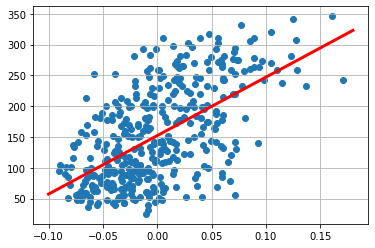

In [17]:
w , b = lr.coef_, lr.intercept_
plt.scatter(X_train,y_train)
plt.plot([-0.1,0.18],[-0.1*w+b, 0.18*w +b],'r',lw = 3)
plt.grid()
plt.show()

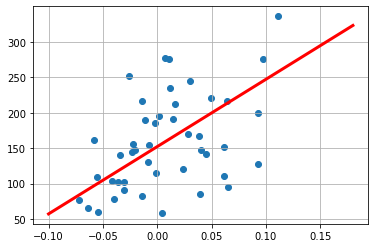

In [18]:
plt.scatter(X_test,y_test)
plt.plot([-0.1,0.18],[-0.1*w+b, 0.18*w +b],'r',lw = 3)
plt.grid()
plt.show()

### QUIZ]
## 당뇨병 vs BP

In [19]:
df.bp.shape #reshape 필요

(442,)

In [20]:
X = df.bp.values.reshape(-1,1)
y = df.target
X.shape, y.shape

((442, 1), (442,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.1, random_state = 2021
) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 1), (45, 1), (397,), (45,))

In [ ]:
# 위 코드와 동일한 결과
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data[:,3:4], y, test_size = 0.1, random_state = 2021
) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [31]:
# 슬라이싱 이용
diabetes.data[:,3].shape # (442,) # 1차원
diabetes.data[:,3:4].shape # (442, 1) 행과 열 모두 슬라이싱 표기시 -> 2차원

(442, 1)

In [21]:
# from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y) #학습
pred = lr.predict(X_test) #예측

LinearRegression()

In [32]:
w, b = lr.coef_, lr.intercept_
rss= lr._residues
w[0], b, rss

(714.7416437042881, 152.13348416289585, 2110153.507189273)

In [33]:
 #선형회귀에서의 모델평가

# mean_squared_error
# from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
# r2_score
# from sklearn.metrics import r2_score
r2=r2_score(y_test, pred)

mse,rmse,r2

(3366.4074911081775, 58.02075052175883, 0.22712625863190306)

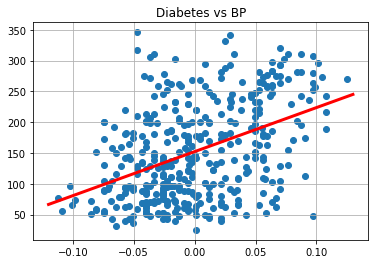

In [34]:
plt.scatter(X_train,y_train)
plt.plot([-0.12,0.13],[-0.12*w+b, 0.13*w +b],'r',lw = 3)
plt.title("Diabetes vs BP")
plt.grid()
plt.show()

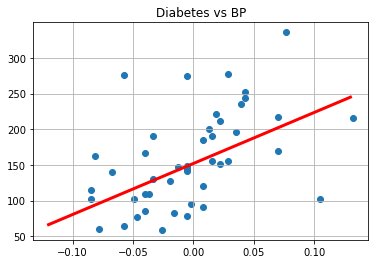

In [35]:
plt.scatter(X_test,y_test)
plt.plot([-0.12,0.13],[-0.12*w+b, 0.13*w +b],'r',lw = 3)
plt.title("Diabetes vs BP")
plt.grid()
plt.show()

# 회귀 표본 만들어 연습하기

In [37]:
from sklearn.datasets import make_regression # 회귀 표본 만들기
X,y = make_regression(
    n_samples = 100, n_features=1, n_targets=1, random_state= 2021
)

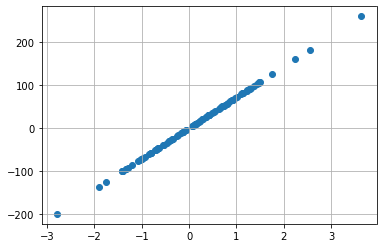

In [38]:
plt.scatter(X,y)
plt.grid()
plt.show()

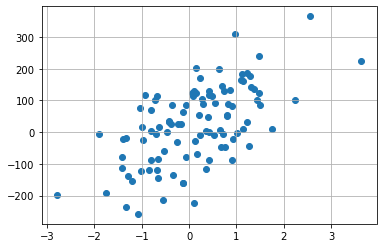

In [54]:
X,y = make_regression(
    n_samples = 100, n_features=1, n_targets=1, 
    noise = 100, bias = 10,  random_state= 2021  # noise 와 bias 를 줌
)
# 상태 확인
plt.scatter(X,y)
plt.grid()
plt.show()

In [55]:
lr = LinearRegression()
lr.fit(X,y)
w,b = lr.coef_[0], lr.intercept_


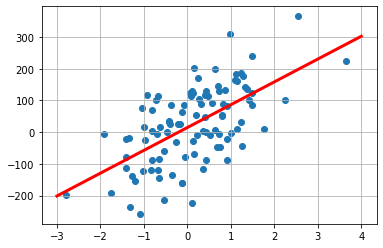

In [56]:
plt.scatter(X,y)
plt.plot([-3,4], [-3*w+b,4*w+b], 'r', lw =3)
plt.grid()
plt.show()

In [57]:
r2 = lr.score(X,y) # noise 줄이면  r2square 값 올라감
w, b, r2

(71.93719814461535, 14.538265236532116, 0.364424472577878)